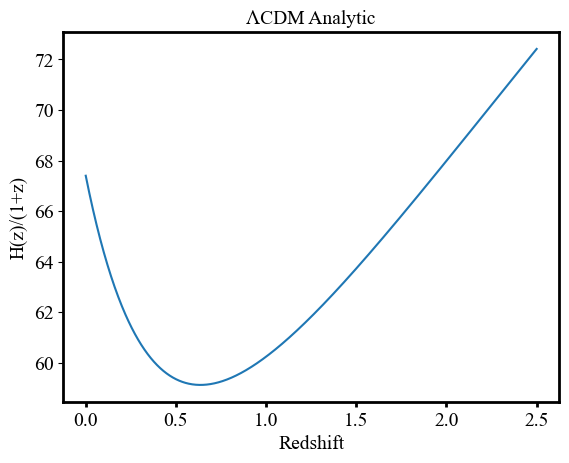

With No Mergers, Values at z = 0: 
Omega_m: 
0.3121973851075922
Omega_r: 
9.061444030764565e-05
Omega_Lambda: 
0.6877120004521003
Hubble Constant (km/(sec Mpc)): 
67.33669798854245
Total Energy Density: 
8.515055045326903e-27
 


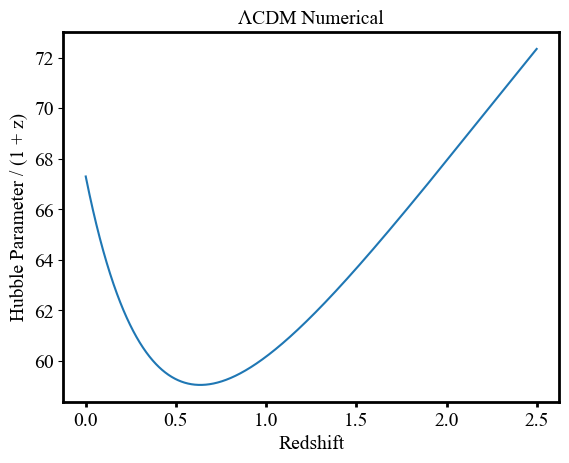

In [9]:
"""
Here we compute H(z) for Lambda-CDM numerically and analytically. We see there is an excellent match.
One could use more sophisticated methods for numerically integrating the differential equations, though
since the match to the analytic case is good, this complication is not necessary. 
"""

import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.cosmology import Planck18 as cosmo

from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

MetersPerParsec = 3.086*(10**(16))
MetersPerGpc = (10**9)*MetersPerParsec
MetersPerMpc = (10**6)*MetersPerParsec
SecondsperYear=365*24*60*60
SMBHBinaryMass=2*(10**7) #Solar Masses
KgperSolarMass = 1.989*(10**(30))
SMBHBinaryMass = SMBHBinaryMass*KgperSolarMass #now in kg 
c = 299792458 #m/s
G = 6.6743*(10**(-11)) # m^3 kg^−1 s^−2
Epsilon = 0.08 #Fraction of mass converted to gravitational waves 
H0UnitConversion = 1000/(MetersPerParsec*1000000)

h = 0.674
H0 = 100 * h           # km/s/Mpc
H0_SI = H0 * H0UnitConversion  # s^-1
rho_crit_0 = 3 * H0_SI**2 / (8 * np.pi * G)  # Critical density today, kg/m^3
Omega_r0 = 4.15e-5 / h**2  # Radiation density parameter (photons + neutrinos), from Dodelson 
Omega_m0 = 0.14241 / h**2 # Matter density parameter 
Omega_Lambda0 = 1 - Omega_m0 - Omega_r0 #Sets flatness 

#Analytic computation 
z_vals = np.linspace(0, 2.5, 1000)
Hz_vals = [H0 * np.sqrt(Omega_m0*(1+z)**3 + Omega_r0*(1+z)**4 + Omega_Lambda0) for z in z_vals]
Hz1pz = [H/(1+z) for H,z in zip(Hz_vals, z_vals)] #Dividing H(z) by 1+z for plotting. This has been done in the literature before. 

plt.plot(z_vals, Hz1pz)
plt.title('ΛCDM Analytic')
plt.xlabel("Redshift")
plt.ylabel("H(z)/(1+z)")
plt.show()

# Friedman Equation 
def H(z, rho_m, rho_r, rho_Lambda):
    rho_total = rho_m + rho_r + rho_Lambda
    return math.sqrt((8*math.pi*G/3)*(rho_total))

def RhoCritical(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return 3*Hval*Hval/(8*math.pi*G) 

#Returns drho_r / dz 
def drhordz(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return (-1/(Hval*(1+z)))*(-4*Hval*rho_r)

#Returns drho_m / dz 
def drhomdz(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return (1/(Hval*(1+z)))*(3*Hval*rho_m)

#Setting initial conditions (at z = 1090)
rho_Lambda = Omega_Lambda0*rho_crit_0 #physical energy density is constant for cosmological constant
rho_r = Omega_r0*rho_crit_0*(1+1090)**4
rho_m = Omega_m0*rho_crit_0*(1+1090)**3
z = 1090 #Redshift at CMB formation 
dz = -0.001
HList_No_Mergers=[]
zList_No_Mergers=[]
#Euler's method, using it bc it is simple 
while z>0:
    rho_r_old = rho_r
    rho_m_old = rho_m 
    rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda)
    rho_m = rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda)
    HList_No_Mergers.append(H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion)
    zList_No_Mergers.append(z)
    z = z + dz
    
RhoCrit=RhoCritical(z, rho_m, rho_r, rho_Lambda)
Omega_m=rho_m/RhoCrit
Omega_r=rho_r/RhoCrit    
print("With No Mergers, Values at z = 0: ")
print("Omega_m: ")
print(Omega_m)
print("Omega_r: ")
print(Omega_r)
print("Omega_Lambda: ")
print(rho_Lambda/RhoCrit)
H0New = H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion
print("Hubble Constant (km/(sec Mpc)): ")
print(H0New)
print("Total Energy Density: ")
print(rho_r + rho_m + rho_Lambda)
print(" ")

H1pzList_No_Mergers=[]
for index in range(len(HList_No_Mergers)):
    H1pzList_No_Mergers.append(HList_No_Mergers[index]/(1+zList_No_Mergers[index]))
    
plt.plot(zList_No_Mergers[-2500:-1], H1pzList_No_Mergers[-2500:-1])
plt.title("ΛCDM Numerical")
plt.xlabel("Redshift")
plt.ylabel("Hubble Parameter / (1 + z)")
plt.show()

In [10]:
import numpy as np
#This is used to set initial conditions (densities at z = 1090).

def InitialConditions(h):
    # Constants
    c = 299792458          # m/s
    G = 6.67430e-11       # m^3 kg^-1 s^-2
    MetersPerMpc = 3.086e22  # meters per Mpc
    z_rec = 1090          # Redshift at recombination

    # Derived parameters
    H0 = 100 * h           # km/s/Mpc
    H0_SI = H0 * 1000 / MetersPerMpc  # s^-1
    rho_crit_0 = 3 * H0_SI**2 / (8 * np.pi * G)  # Critical density today, kg/m^3
    Omega_r = 4.15e-5 / h**2  # Radiation density parameter (photons + neutrinos), from Dodelson 
    Omega_m = 0.14241/h**2
    Omega_Lambda = 1.0 - Omega_m - Omega_r  # Dark energy density for flatness 

    # Density parameters at z=1090
    rho_m_initial = Omega_m * rho_crit_0 * (1 + z_rec)**3  # Total matter density
    rho_r_initial = Omega_r * rho_crit_0 * (1 + z_rec)**4  # Radiation density
    rho_Lambda_initial = Omega_Lambda * rho_crit_0  # Dark energy density, is constant with redshift 
    return rho_m_initial, rho_r_initial, rho_Lambda_initial

In [11]:
from matplotlib import font_manager


for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext="ttf"):
    if 'Urbanist'.lower() in fontpath.lower():
        print(fontpath)

from matplotlib.font_manager import FontProperties

# !!! change it to your path
personal_path = "/home/hoelsczj/Library/static/"

# get normal font and store it in `urbanist-Light`
font_path = personal_path + "Urbanist-Regular.ttf"
font_manager.fontManager.addfont(font_path)
urbanist= FontProperties(fname=font_path)

# get bold font and store it in `urbanist_bold`
font_path = personal_path + "Urbanist-Bold.ttf"
font_manager.fontManager.addfont(font_path)
urbanist_bold = FontProperties(fname=font_path)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = urbanist.get_name()
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', family="urbanist", size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, lw=2)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rcParams['xtick.minor.width']=2   
plt.rcParams['xtick.major.width']=2 
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

from pyfonts import load_google_font
from pypalettes import load_cmap
import pandas as pd
cmap = load_cmap("PurpleGreens")

In [12]:

import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.cosmology import Planck18 as cosmo

def WithMergers(h_sample, Rate):
    # Constants
    c = 299792458  # m/s
    G = 6.67430e-11  # m^3 kg^-1 s^-2
    MetersPerParsec = 3.086e16  # meters per parsec
    MetersPerMpc = 1e6 * MetersPerParsec  # meters per Mpc
    H0UnitConversion = 1000 / (MetersPerMpc)
    MetersPerGpc = (10**9)*MetersPerParsec
    SecondsperYear=365*24*60*60
    SMBHBinaryMass=2*(10**7) #Solar Masses
    KgperSolarMass = 1.989*(10**(30))
    SMBHBinaryMass = SMBHBinaryMass*KgperSolarMass #now in kg 
    Epsilon = 0.08 #Fraction of mass that is converted to gravitational waves

    #This is a simple step function merger rate that starts at redshift = 10 
    def RSMBHComoving(z, Rate):
        if z>10:
            return 0
        else:
            return Rate*(1/MetersPerGpc**3)*(1/SecondsperYear) #Converts to units of m^-3 sec^-1

    # Friedman Equation 
    def H(z, rho_m, rho_r, rho_Lambda):
        rho_total = rho_m + rho_r + rho_Lambda
        return math.sqrt((8*math.pi*G/3)*(rho_total))

    def RhoCritical(z, rho_m, rho_r, rho_Lambda):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return 3*Hval*Hval/(8*math.pi*G) 
    
    #Returns drho_r / dz 
    def drhordz(z, rho_m, rho_r, rho_Lambda, Rate):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-4*Hval*rho_r + RSMBHComoving(z, Rate)*((1+z)**3)*Epsilon*SMBHBinaryMass)
    
    #Returns drho_m / dz 
    def drhomdz(z, rho_m, rho_r, rho_Lambda, Rate):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (1/(Hval*(1+z)))*(3*Hval*rho_m + RSMBHComoving(z, Rate)*((1+z)**3)*Epsilon*SMBHBinaryMass)
    
    rho_m, rho_r, rho_Lambda = InitialConditions(h_sample) #Obtaining densities at z = 1090 
    z = 1090 #Redshift at CMB formation 
    dz = -0.001
    HList_Mergers=[]
    zList_Mergers=[]
    #Euler's method, using it bc it is simple 
    while z>0:
        rho_r_old = rho_r
        rho_m_old = rho_m 
        #Stuff below is to forbid negative rho_m
        if (rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)) > 0:
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)
            rho_m = rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)
        else:
            rho_m = 0
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, 0)
        HList_Mergers.append(H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion)
        zList_Mergers.append(z)
        z = z + dz

    RhoCrit=RhoCritical(z, rho_m, rho_r, rho_Lambda)
    Omega_m=rho_m/RhoCrit
    Omega_r=rho_r/RhoCrit 
   
    H0New = H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion
   
    H1pzList_Mergers=[] #Dividing H by 1+z, useful for plotting later. 
    for index in range(len(HList_Mergers)):
        H1pzList_Mergers.append(HList_Mergers[index]/(1+zList_Mergers[index]))

    #Here I apply a cubic spline interpolation, useful for plotting things.
    import scipy
    Interpolated_H = scipy.interpolate.CubicSpline(np.flip(zList_Mergers), np.flip(HList_Mergers), axis=0, extrapolate=None)

    return zList_Mergers, H0New, H1pzList_Mergers, Interpolated_H

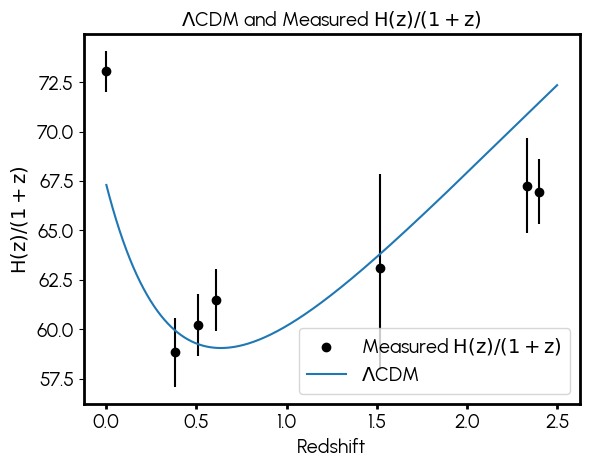

In [13]:
#Here we have measured values for H(z), with upper and lower error bars. 
H_Measured = np.array([73.04, 81.2, 90.9, 99, 159, 224, 227.6]) #Hubble parameter, km / (sec Mpc)
H_Measured_Uncertainty_Upper = np.array([1.04, 2.42, 2.37, 2.51, 12, 8, 5.74])
H_Measured_Uncertainty_Lower = np.array([1.04, 2.42, 2.37, 2.51, 13, 8, 5.47])
H_Measured_Redshift = np.array([0, 0.38, 0.51, 0.61, 1.52, 2.33, 2.4]) #Redshifts for the values of H

#This is so we can plot things as H(z) / (1+z) :
H_Measured_1pz = []
H_Measured_Uncertainty_Upper_1pz = []
H_Measured_Uncertainty_Lower_1pz = []
for index in range(len(H_Measured)):
    H_Measured_1pz.append(H_Measured[index]/(1+H_Measured_Redshift[index]))
    H_Measured_Uncertainty_Upper_1pz.append(H_Measured_Uncertainty_Upper[index]/(1+H_Measured_Redshift[index]))
    H_Measured_Uncertainty_Lower_1pz.append(H_Measured_Uncertainty_Lower[index]/(1+H_Measured_Redshift[index]))

H_Measured_1pz = np.array(H_Measured_1pz) #Divided by (1+z)
H_Measured_Uncertainty_Upper_1pz = np.array(H_Measured_Uncertainty_Upper_1pz)
H_Measured_Uncertainty_Lower_1pz = np.array(H_Measured_Uncertainty_Lower_1pz)

plt.scatter(H_Measured_Redshift, H_Measured_1pz, color='k', label=r'Measured $\rm{H}(z)/(1+z)$')
plt.vlines(x = H_Measured_Redshift, ymin = H_Measured_1pz - H_Measured_Uncertainty_Lower_1pz, ymax = H_Measured_1pz + H_Measured_Uncertainty_Upper_1pz, colors = 'black')
plt.plot(zList_No_Mergers[-2500:-1], H1pzList_No_Mergers[-2500:-1], label=r'$Λ$CDM')
plt.title(r'$\Lambda$CDM and Measured $\rm{H}(z)/(1+z)$')
plt.xlabel('Redshift')
plt.ylabel(r'$\rm{H}(z)/(1+z)$')
plt.legend()



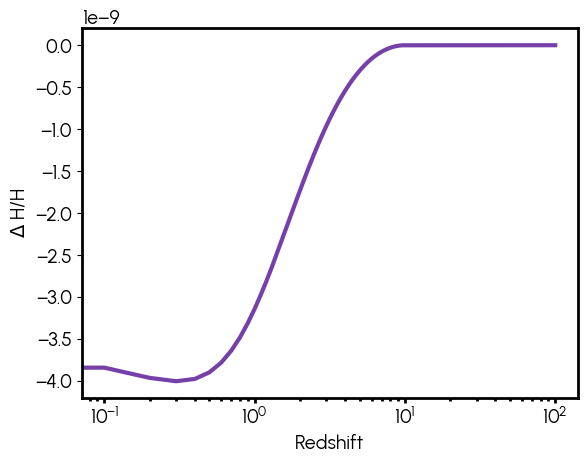

In [14]:
Rate = 10**(-4)
h = 0.674

#Here I apply a cubic spline interpolation, useful for plotting things below.
import scipy
#Note that np.flip is used becuase the interpolator will throw an error if you feed it a list of z-values that goes from large numbers to small ones. 
Interpolated_H_No_Mergers=scipy.interpolate.CubicSpline(np.flip(zList_No_Mergers), np.flip(HList_No_Mergers), axis=0, extrapolate=None)
Interpolated_H_Mergers = WithMergers(h, Rate)[3]

zList=np.linspace(0, 100, 1000) #Redshifts between 0 and 100, for plotting 
zList=np.flip(zList)
deltaH_H = (Interpolated_H_Mergers(zList) - Interpolated_H_No_Mergers(zList))/Interpolated_H_No_Mergers(zList)
#This is the Hubble parameter with mergers minus the Hubble parameter in Lambda-CDM (no mergers) divided by H with no mergers.

#Plotting fractional change in H 
plt.plot(zList, deltaH_H, color=cmap(1), linewidth = 3)
plt.xlabel("Redshift")
plt.ylabel(r'$\Delta$ H/H')
plt.xscale("log")
plt.show()


In [15]:

import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.cosmology import Planck18 as cosmo

def WithSolarMergers(h_sample, Rate):
    # Constants
    c = 299792458  # m/s
    G = 6.67430e-11  # m^3 kg^-1 s^-2
    MetersPerParsec = 3.086e16  # meters per parsec
    MetersPerMpc = 1e6 * MetersPerParsec  # meters per Mpc
    H0UnitConversion = 1000 / (MetersPerMpc)
    MetersPerGpc = (10**9)*MetersPerParsec
    SecondsperYear=365*24*60*60
    BHBinaryMass=2*30 #Solar Masses
    KgperSolarMass = 1.989*(10**(30))
    BHBinaryMass = BHBinaryMass*KgperSolarMass #now in kg 
    Epsilon = 0.08 #Fraction of mass converted to gravitational waves 

    #This is a simple step function merger rate that starts at redshift = 15
    def RBHComoving(z, Rate):
        if z>15:
            return 0
        else:
            return Rate*(1/MetersPerGpc**3)*(1/SecondsperYear) #Converting to m^-3 sec^-1 

    # Friedman Equation 
    def H(z, rho_m, rho_r, rho_Lambda):
        rho_total = rho_m + rho_r + rho_Lambda
        return math.sqrt((8*math.pi*G/3)*(rho_total))

    def RhoCritical(z, rho_m, rho_r, rho_Lambda):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return 3*Hval*Hval/(8*math.pi*G) 

    #Returns drho_r / dz 
    def drhordz(z, rho_m, rho_r, rho_Lambda, Rate):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-4*Hval*rho_r + RBHComoving(z, Rate)*((1+z)**3)*Epsilon*BHBinaryMass)

    #Returns drho_m / dz 
    def drhomdz(z, rho_m, rho_r, rho_Lambda, Rate):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (1/(Hval*(1+z)))*(3*Hval*rho_m + RBHComoving(z, Rate)*((1+z)**3)*Epsilon*BHBinaryMass)
    
    rho_m, rho_r, rho_Lambda = InitialConditions(h_sample) #Sets initial conditions at z = 1090 
    z = 1090 #Redshift at CMB formation 
    dz = -0.001
    HList_Mergers=[]
    zList_Mergers=[]
    #Euler's method, using it bc it is simple 
    while z>0:
        rho_r_old = rho_r
        rho_m_old = rho_m 
        #Stuff below is to forbid negative rho_m
        if (rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)) > 0:
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)
            rho_m = rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)
        else:
            rho_m = 0
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, 0)
        HList_Mergers.append(H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion)
        zList_Mergers.append(z)
        z = z + dz

    RhoCrit=RhoCritical(z, rho_m, rho_r, rho_Lambda)
    Omega_m=rho_m/RhoCrit
    Omega_r=rho_r/RhoCrit 
   
    H0New = H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion
   
    H1pzList_Mergers=[] #H divided by 1+z, useful for plotting 
    for index in range(len(HList_Mergers)):
        H1pzList_Mergers.append(HList_Mergers[index]/(1+zList_Mergers[index]))

    #Here I apply a cubic spline interpolation, useful for plotting things.
    import scipy
    Interpolated_H=scipy.interpolate.CubicSpline(np.flip(zList_Mergers), np.flip(HList_Mergers), axis=0, extrapolate=None)

    return zList_Mergers, H0New, H1pzList_Mergers, Interpolated_H

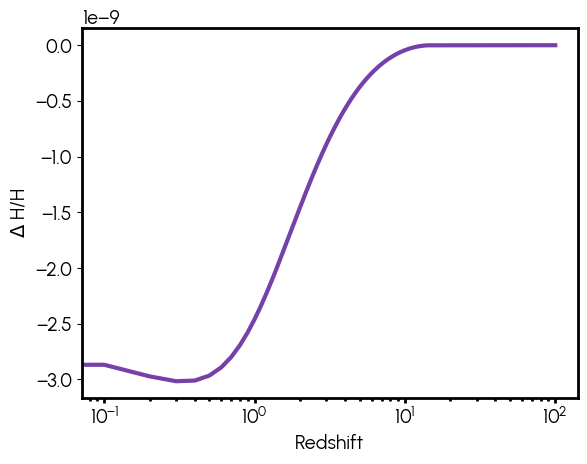

In [16]:
Rate = 24
h = 0.674

#Here I apply a cubic spline interpolation, useful for plotting things below.
import scipy
#Note that np.flip is used becuase the interpolator will throw an error if you feed it a list of z-values that goes from large numbers to small ones. 
Interpolated_H_No_Mergers=scipy.interpolate.CubicSpline(np.flip(zList_No_Mergers), np.flip(HList_No_Mergers), axis=0, extrapolate=None)
Interpolated_H_Mergers = WithSolarMergers(h, Rate)[3]

zList=np.linspace(0, 100, 1000) #Redshifts between 0 and 100, for plotting 
zList=np.flip(zList)
deltaH_H = (Interpolated_H_Mergers(zList) - Interpolated_H_No_Mergers(zList))/Interpolated_H_No_Mergers(zList)
#This is the Hubble parameter with mergers minus the Hubble parameter in Lambda-CDM (no mergers) divided by H with no mergers.

#Plotting fractional change in H for comparison against a plot in the paper. 
plt.plot(zList, deltaH_H, color=cmap(1), linewidth = 3)
plt.xlabel("Redshift")
plt.ylabel(r'$\Delta$ H/H')
plt.xscale("log")
plt.show()
